# Control Systems 1, NB03: Time Response and Stability
2024 ETH Zurich, Mark Benazet Castells, Jonas Holinger, Felix Muller, Matteo Penlington; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli


This interactive notebook is designed to introduce fundamental concepts in control systems engineering. It covers the basics of system modeling, classification, and analysis, with a focus on building intuition through visual and interactive examples.

Authors:
- Jonas Holinger; jholinger@ethz.ch
- Shubham Gupta; shugupta@ethz.ch


## Learning Objectives

After completing this notebook, you should be able to:

1. Understand how to compute the general form response of a linear system by adding its inital condition response and its forced response
2. Understand the several definitions of stability for a dynamical system
3. Understand wether a LTI system is stable or unstable by looking at the eigenvalues of the A Matrix

# Setup

## Installing the required packages:


In [2]:
%pip install numpy matplotlib scipy ipywidgets control IPython

## Import the packages
The following cell imports the required packages. Run it before running the rest of the notebook.

In [8]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from scipy.integrate import odeint
from IPython.display import display, clear_output, Math

## 1. Output Response of a Linear System
If we want to calculate the output of a LTI system we can seperate the problem into two cases:
- **Initial-conditions response:**

  $$
  \left\{
  \begin{array}{ll}
  x_{IC}(0) = x_0 \\
  u_{IC}(t) = 0
  \end{array}
  \right.
  \quad \longrightarrow \quad y_{IC};
  $$

- **Forced response:**

  $$
  \left\{
  \begin{array}{ll}
  x_{F}(0) = 0 \\
  u_{F}(t) = u(t)
  \end{array}
  \right.
  \quad \longrightarrow \quad y_{F}.
  $$



From previous lectures we learned that the definition of linear system is: 
$$
\Sigma (\alpha u_a + \beta u_b) = \alpha (\Sigma u_a) + \beta (\Sigma u_b) = \alpha y_a + \beta y_b
$$
and we also know that due to causality the  system can be summarised by a state $x(t)$.
Because of these properties, the output of an linear  system can be expressed as: $$y = y_{IC}+y_{F}$$

### 1.1 Example: Output Response of a Scalar Linear System
As an example of a scalar linear system,let us consider a room with temperatur $T(t)$, inital Temperatur of the room $T_0$ and thermal capacity C. The zemperatur outside is $T_{amb}$ and the room gets heated with power P(t) and loses heat given by the eqution $G(T(t) - T_{amb})$ where $G$ is the thermal conductance. The system is described by the following formula from Thermodynamics: $$C \frac{dT(t)}{dt} + G \left(T(t) - T_{\text{ambient}}\right) = P(t)$$


![Image Title](./media/sys4iofo.png)


We choose $T(t)$ as our state and $P(t)$ as our input:
$$y(t) = x(t) = T(t)$$
$$u(t) = P(t)$$
$$\dot{x}(t) = \frac{-G}{C} x(t) + \frac{1}{C} u(t) + \frac{G T_{\text{amb}}}{C}$$
\
Since its winter we assume $T_{amb}$ is 0. This gives us the following describtion in the state space model:
$$a=-G/C$$
$$b = 1/C$$
$$c = 1$$
$$d = 0$$



In [3]:
#initalise the system

# Define a time vector
time = np.linspace(0, 20, 500)

#Define the param
C = 2
G = 3

# Define state-space system
def create_system(G, C):
    A = -G / C
    B = 1 / C
    C_matrix = 1
    D = 0
    return ct.StateSpace(A, B, C_matrix, D)

# func for generating input
def generate_input(input_type, time_vector):
    if input_type == 'Constant':
        return np.full_like(time_vector, forced_input_slider.value)
    elif input_type == 'Ramp (5s)':
        ramp_duration = 5
        ramp_input = np.clip(np.linspace(0, forced_input_slider.value, int(ramp_duration / time[1])),
                              0, None)
        constant_input = np.full_like(time_vector[int(ramp_duration / time[1]):], forced_input_slider.value)
        return np.concatenate((ramp_input, constant_input))
    elif input_type == 'Ramp (15s)':
        ramp_duration = 15
        ramp_input = np.clip(np.linspace(0, forced_input_slider.value, int(ramp_duration / time[1])),
                              0, None)
        constant_input = np.full_like(time_vector[int(ramp_duration / time[1]):], forced_input_slider.value)
        return np.concatenate((ramp_input, constant_input))
    elif input_type == 'Sinusoidal':
        return forced_input_slider.value * np.sin(0.5 * np.pi * time_vector)  # Frequency can be adjusted

### 1.2 Inital Condition Response
To get the inital condition response for the system we need to solve the following ODE;
$$
\dot{x}_{IC}(t) = a*x(t)_{IC}, 
$$
$$
y(t)_{IC}=cx(t)_{IC}
$$
$$
x(0) = x_0
$$

The general solution is known from Analysis :
$$
x(t)_{IC} = e^{at}T_0
$$

$$
y(t)_{IC} = ce^{at}T_0
$$
For our specific problem we get:
$$
y(t)_{IC} = e^{\frac{-G}{C}}T_0
$$

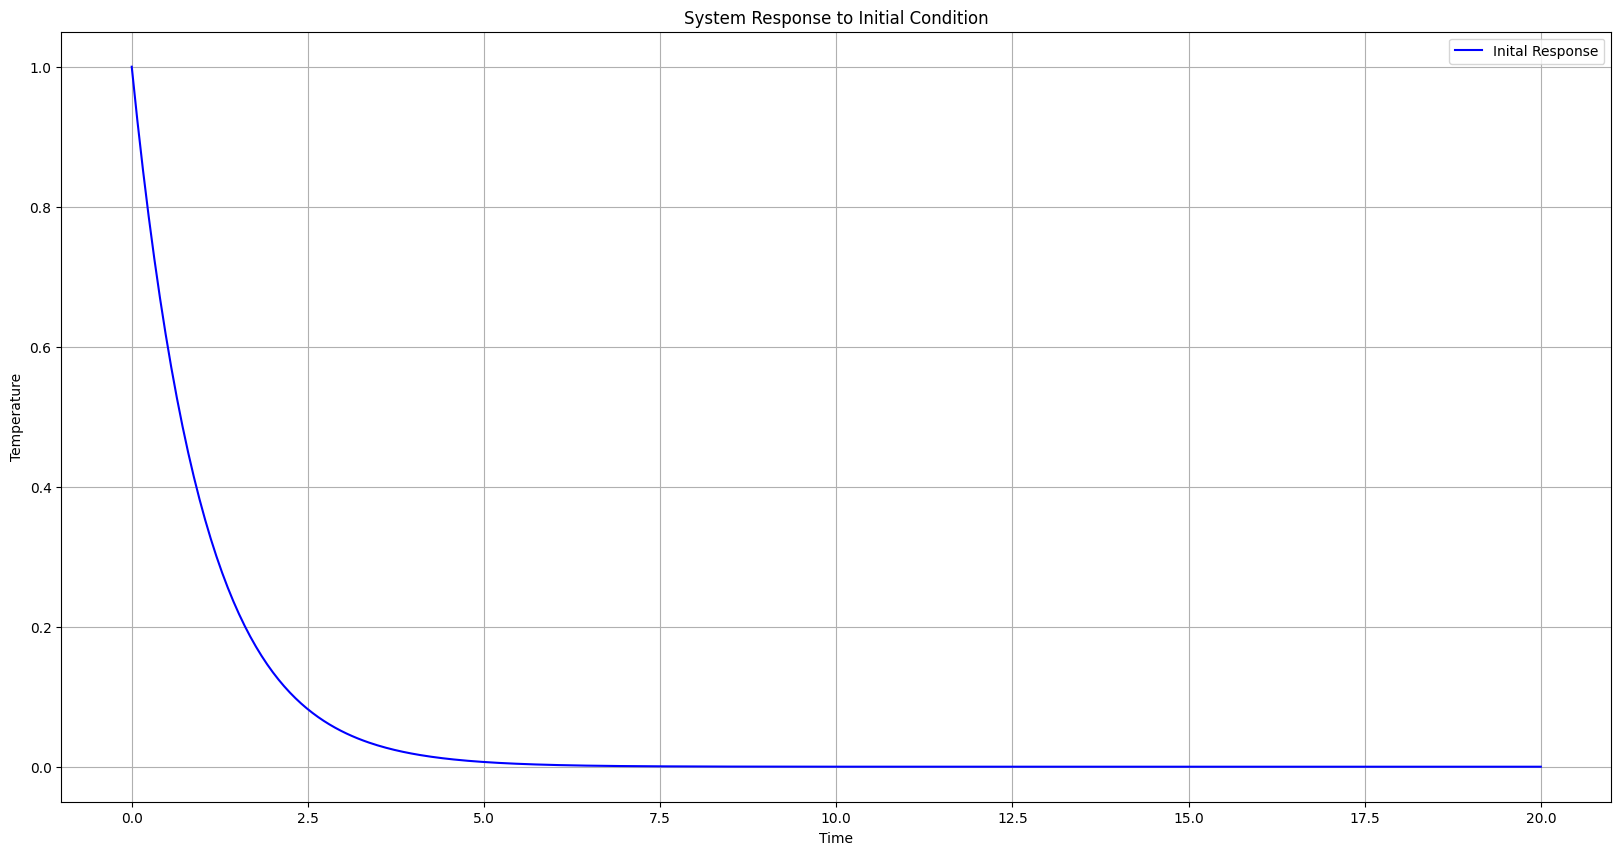

FloatSlider(value=1.0, description='G:', max=5.0, min=0.1)

FloatSlider(value=1.0, description='C:', max=5.0, min=0.1)

FloatSlider(value=1.0, description='T0:', max=40.0, min=-15.0)

<IPython.core.display.Math object>

In [4]:
def update_plot_ic(t_0):
    clear_output(wait=True)  # Clear previous output
    system = create_system(G_slider.value, C_slider.value)  
    plt.figure(figsize=(20, 10))
    
    # Simulate the response to the current initial condition
    t, y = ct.initial_response(system, T=time, X0=[t_0])
    
    # Plot the responses
    plt.plot(t, y, label='Inital Response', color='blue')
    plt.title('System Response to Initial Condition')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.grid()
    plt.legend()
    plt.show()
    
    formula = f"y(t) = e^{{\\frac{{-{G_slider.value}}}{{{C_slider.value}}}}} {{{t_0}}}"
    # Display sliders and dropdown again
    display(G_slider, C_slider, t_0_slider)
    display(Math(formula))
    
G_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='G:')
C_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='C:')
t_0_slider = widgets.FloatSlider(value=1.0, min=-20, max=20, step=0.5, description='T0:')

# Observers for the sliders and dropdown
G_slider.observe(lambda change: update_plot_ic(t_0_slider.value), names='value')
C_slider.observe(lambda change: update_plot_ic(t_0_slider.value), names='value')
t_0_slider.observe(lambda change: update_plot_ic(t_0_slider.value), names='value')

# Display sliders and initial plot
display(G_slider, C_slider, t_0_slider)
update_plot_ic(t_0_slider.value)




### 1.2 Forced Response

The forced response, which was derived in the lecture with $u(t) \neq 0$ and $x_0 = 0$ is:
$$ x_{FC}=\int_{0}^{t}e^{a\cdot (t-\tau )}bu(\tau )d\tau $$
$$  y_{FC}=\int_{0}^{t}e^{a\cdot (t-\tau )}bu(\tau )d\tau + du(t)$$

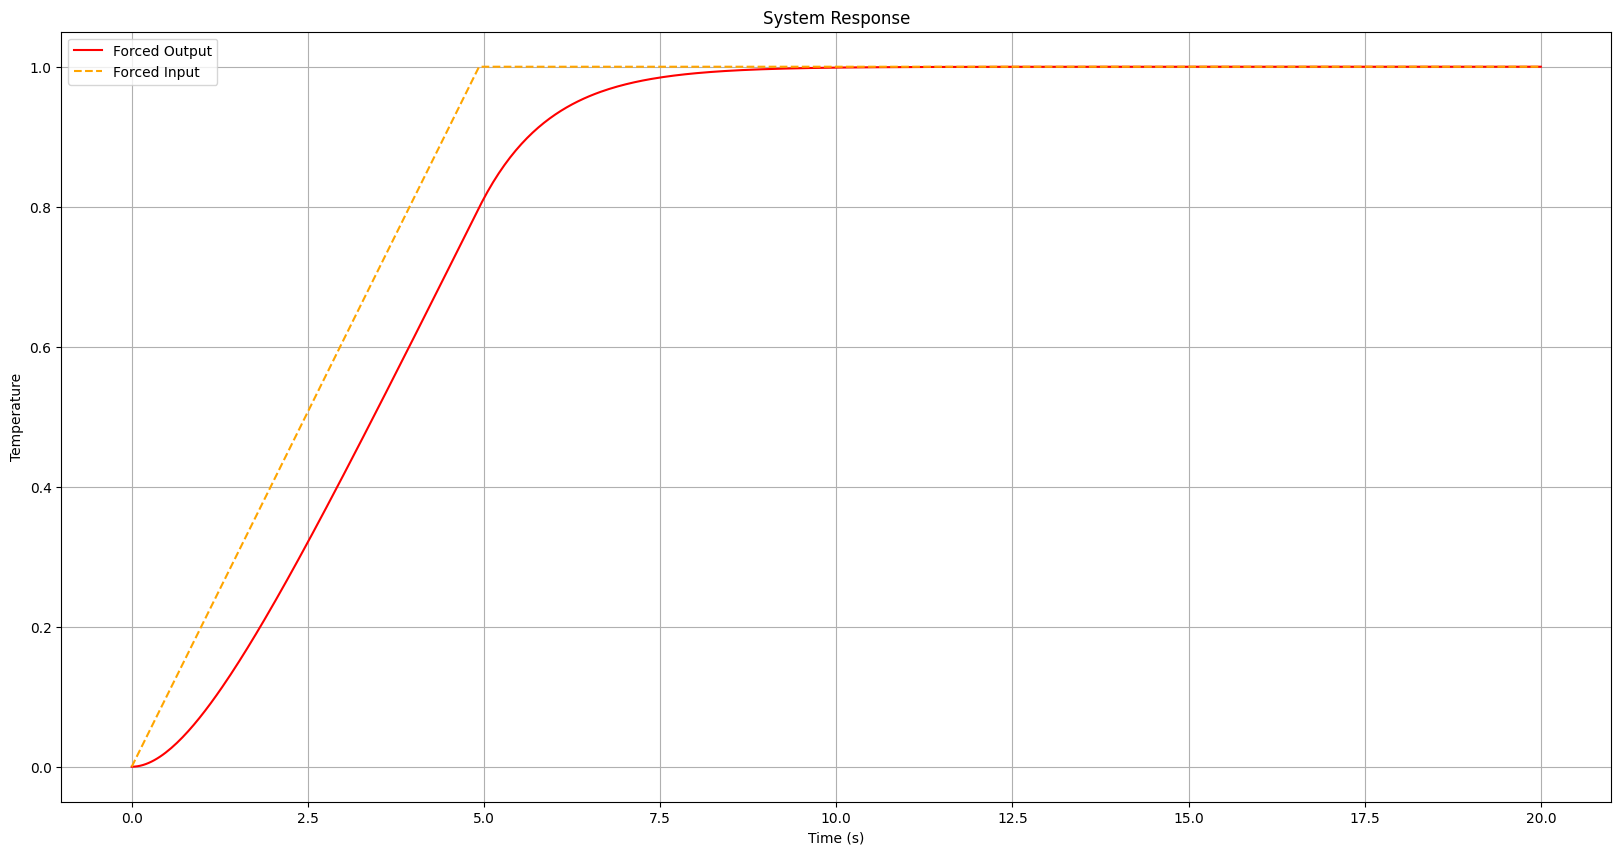

FloatSlider(value=1.0000000000000002, description='G:', max=5.0, min=0.1)

FloatSlider(value=1.0000000000000002, description='C:', max=5.0, min=0.1)

FloatSlider(value=1.0000000000000036, description='T0:', max=40.0, min=-15.0)

FloatSlider(value=1.0, description='Input:', max=30.0, step=0.5)

Dropdown(description='Input Type:', index=1, options=('Constant', 'Ramp (5s)', 'Ramp (15s)', 'Sinusoidal'), va…

ToggleButton(value=False, description='Show Initial Response')

ToggleButton(value=False, description='Show Total Response')

In [5]:
# Function to update the plot
def update_plot_fc(t_0, input_type, show_initial_response, show_total_response):
    clear_output(wait=True)  
    system = create_system(G_slider.value, C_slider.value)  
    
    plt.figure(figsize=(20, 10))

    # Simulate the response to the current initial condition
    t, initial_response = ct.initial_response(system, T=time, X0=[t_0])
    
    # Generate the forced input
    input_fc = generate_input(input_type, time)
    
    # Use control's forced_response to get output for the input signal
    t, forced_response = ct.forced_response(system, T=time, U=input_fc)
    
    # Total response
    total_response = initial_response + forced_response
    
    # Plot the forced input response
    plt.plot(t, forced_response, label='Forced Output', color='red')
    plt.plot(t, input_fc, label='Forced Input', color='orange', linestyle='--')
    # Plot initial response only if the toggle is on
    if show_initial_response:
        plt.plot(t, initial_response, label='Initial Response', color='green')
        
    # Plot total response only if the toggle is on
    if show_total_response:
        plt.plot(t, total_response, label='Total Response', color='blue')

    plt.title('System Response')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature')
    plt.grid()
    plt.legend()
    plt.show()

    # Display sliders and dropdown again
    display(G_slider, C_slider, t_0_slider, forced_input_slider, 
            input_type_dropdown, show_initial_response_button, 
            show_total_response_button)


# Create sliders for G, C, t_0, and a dropdown for input type
G_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='G:')
C_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='C:')
t_0_slider = widgets.FloatSlider(value=1.0, min=-15.0, max=40.0, step=0.1, description='T0:')
forced_input_slider = widgets.FloatSlider(value=1.0, min=0, max=30.0, step=0.5, description='Input:')
input_type_dropdown = widgets.Dropdown(
    options=['Constant', 'Ramp (5s)', 'Ramp (15s)', 'Sinusoidal'],
    value='Ramp (5s)',
    description='Input Type:'
)

# Create toggle buttons for showing the initial response and total response
show_initial_response_button = widgets.ToggleButton(
    value=False,
    description='Show Initial Response',
    button_style='',  
)

show_total_response_button = widgets.ToggleButton(
    value=False,
    description='Show Total Response',
    button_style='',
)

# Observers for the sliders, dropdown, and toggle buttons
G_slider.observe(lambda change: update_plot_fc(t_0_slider.value, input_type_dropdown.value, 
                                                show_initial_response_button.value, 
                                                show_total_response_button.value), names='value')
C_slider.observe(lambda change: update_plot_fc(t_0_slider.value, input_type_dropdown.value, 
                                                show_initial_response_button.value, 
                                                show_total_response_button.value), names='value')
t_0_slider.observe(lambda change: update_plot_fc(change['new'], input_type_dropdown.value, 
                                                   show_initial_response_button.value, 
                                                   show_total_response_button.value), names='value')
forced_input_slider.observe(lambda change: update_plot_fc(t_0_slider.value, input_type_dropdown.value, 
                                                           show_initial_response_button.value, 
                                                           show_total_response_button.value), names='value')
input_type_dropdown.observe(lambda change: update_plot_fc(t_0_slider.value, change['new'], 
                                                           show_initial_response_button.value, 
                                                           show_total_response_button.value), names='value')
show_initial_response_button.observe(lambda change: update_plot_fc(t_0_slider.value, 
                                                                  input_type_dropdown.value, 
                                                                  change['new'], 
                                                                  show_total_response_button.value), names='value')
show_total_response_button.observe(lambda change: update_plot_fc(t_0_slider.value, 
                                                                 input_type_dropdown.value, 
                                                                 show_initial_response_button.value, 
                                                                 change['new']), names='value')

# Display sliders and initial plot
display(G_slider, C_slider, t_0_slider, forced_input_slider, 
        input_type_dropdown, show_initial_response_button, 
        show_total_response_button)
update_plot_fc(t_0_slider.value, input_type_dropdown.value, 
                show_initial_response_button.value, 
                show_total_response_button.value)


## 2 Output Response of General Linear System

For a system, which is not scalar, we need to compute the matrix exponential.
The definition of our matrix exponential $e^{At}$ is:
$$\frac{de^{At}}{dt}=Ae^{At}=e^{At}A$$
We achive our definition with the following:
$$e^{At}=I+At+\frac{1}{2}(At)^{2}+...+\frac{1}{n!}(At)^{n}$$

In python we can use the function `numpy.exp(A)`.



### 2.1 Diagonalization and Jordan Forms
To make our life easier, when calculating the matrix expontential by hand, we want to bring the matrix A into the Diagonal or Jordan form. The solution in these forms looks like this:  



In Diagnonal Form:
$$
D = \begin{pmatrix} \lambda_1 t & 0 \\ 0 & \lambda_2 t \end{pmatrix}
$$


$$
e^{D} = \begin{pmatrix} e^{\lambda_1 t} & 0 \\ 0 & e^{\lambda_2 t} \end{pmatrix}
$$


In Jordan Form:
$$
J = \begin{pmatrix} \lambda t & 1t \\ 0 & \lambda t \end{pmatrix}
$$


$$
e^{J} =  \begin{pmatrix} e^{\lambda t} & e^{\lambda t} \\ 0 & e^{\lambda t} \end{pmatrix}
$$

### 2.2 Similarity Transformiations
We can use the fact that the choice of a state space model is not unique for a system to transform it to a more suitable form for caclulating the matrix exponential by hand. One method to do that is to use similarity transforms.  $A$ and $\tilde{A}$ are called similiar if there exists an invertible matrix $T$ such that $$ \tilde{A} =  T^{-1}AT$$. If we transform the matrices from our state-space model $(A,B,C,D)$ to $(\tilde{A},\tilde{B},\tilde{C},\tilde{D})$, the time response and the eigenvalues stay the same. Using the similarity transform $x = T \tilde{x}$ and $\tilde{x} = T^{-1}x$

$$
\begin{cases}
\dot{x} = Ax + Bu, \\
y = Cx + Du.
\end{cases}
\quad
$$

we get

$$
\begin{cases}
\dot{\tilde{x}} = (T^{-1} A T) \tilde{x} + (T^{-1} B) u = \tilde{A} \tilde{x} + \tilde{B} u, \\
y = (CT) \tilde{x} + Du = \tilde{C} \tilde{x} + \tilde{D} u.
\end{cases}
$$

To diagnolise $A$, we chose the matrix $T$ whose columns are the eigenvector of A.

#### 2.2.1 Example
We have a state space model with the following matrices.
$$\begin{array}{c} A = \begin{bmatrix} 0 & 1 \\ -2 & -3 \end{bmatrix}, \quad B = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad C = \begin{bmatrix} 1 & 0 \end{bmatrix}, \quad D = 0, \quad x(0) =  \begin{bmatrix} 2 \\ 3 \end{bmatrix} \end{array}$$
To find the Eigenvalues of A we solve: $$\det(A - \lambda I) = 0$$
which gives us the Eigenvalues $\lambda_{1}  = -1$ and $\lambda_{2} = -2$.

We solve $$(A - \lambda I)v = 0$$ to get us the Eigenvectors $ \begin{bmatrix}
1 \\ -1
\end{bmatrix}$ and $\begin{bmatrix}
-1 \\ 2
\end{bmatrix}$
which gives us the matrix $ T = \begin{bmatrix}
1 &  -1\\
-1 &  2\\
\end{bmatrix}
$. We apply the similarity transform to our matrices.


$$\tilde{A} = T^{-1} A T = \begin{bmatrix} -1 & 0 \\ 0 & -2 \end{bmatrix} $$
$$\tilde{B} = T^{-1} B = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $$
$$\tilde{C} = C T = \begin{bmatrix} 1 & -1 \end{bmatrix}$$
$$\tilde{x}_0 = T^{-1}x_0 = \begin{bmatrix} 7 \\ 5 \end{bmatrix}$$
The entries in the diagonal matrix $\tilde{A}$ are the eigenvalues of our matrix $A$. 
Our transformed state response due to inital conidition is $\tilde{x}(t) = e^{\tilde{A}t}\tilde{x}_{0}$ 
$$\begin{bmatrix}
\tilde{x}_1 \\ \tilde{x}_2 
\end{bmatrix} = \begin{bmatrix}
e^{-1t} &  0\\ 0
&  e^{-2t}\\ 
\end{bmatrix}\begin{bmatrix} 7 \\ 5 \end{bmatrix}$$
We can generalise our state by, because we an express $x_0$ as a linear combination with the eigenvector $v_i$ as a basis.
$$x(t) = \sum_{i=1}^{n} e^{\lambda_i t} \tilde{x}_i(0) v_i$$
The general solution to the inital condition if the eigenvalues are real can be expressed as a linear combination in the form:
$$y(t) = Ce^{At}x_{0}= c_{1}e^{\lambda_1 t}x_{0,1} + c_{2}e^{\lambda_2 t}x_{0,2}$$



### 2.3 Quick Recap about the euler formula

For this course its important to rember the euler formula:

$$e^{i\phi} = \cos \phi + i \sin \phi$$

The euler formula helps us to view complex numbers as exponentials and make the math easier to navigate. Due to this a lot of nice properties of the exponentials can be used when dealing with complex numbers.

In [6]:
def update_plot_img(phi):
    plt.figure(figsize=(8, 8))
    
    # Create unit circle
    circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='dotted')
    
    fig, ax = plt.subplots()
    ax.add_artist(circle)

    x = np.cos(phi)
    y = np.sin(phi)

    # Plotting the point on the unit circle
    ax.plot([0, x], [0, y], color='red', linewidth=2, label='Radius: e^{iφ}')
    ax.plot(x, y, 'ro')  # Point on the circle

    # Plot the cosine and sine functions
    t = np.linspace(0, 2 * np.pi, 100)
    ax.plot([0, math.cos(phi)], [0, 0], color='green', linestyle='--', linewidth=2, label='cos')
    ax.plot([0, 0], [0, math.sin(phi)], color='blue', linestyle='--', linewidth=2, label='sin')
    # Formatting the plot
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axhline(0, color='black', linewidth=0.5, ls='--')
    ax.axvline(0, color='black', linewidth=0.5, ls='--')
    ax.set_aspect('equal', 'box')
    ax.set_title(f'$e^{{i{phi:.2f}}} = \\cos({phi:.2f}) + i\\sin({phi:.2f})$', fontsize=14)
    ax.legend()
    plt.grid()
    plt.show()

phi_slider = widgets.FloatSlider(value=0, min=0, max=2 * np.pi, step=0.1, description='φ (radians)')
widgets.interactive(update_plot_img, phi=phi_slider)


interactive(children=(FloatSlider(value=0.0, description='φ (radians)', max=6.283185307179586), Output()), _do…

## 3. Stability

The notion of stability is central in the study of control theory. The core idea behind stability is that the system should not behave abruptly. The response of the system should be controlled and predictible. Many notions of how to define stability exist.    

1. **Lyapnuov Stability**: A system is called stable in the sense of Lyapunov if, for any initial condition bounded by $\epsilon$, the ouput of the system is remains bounded by $\delta$ for zero input.
$$ 
    ||x(0)||\leq\epsilon\;,\; u(t) = 0 \implies ||x(t)||\leq\delta\;\forall\; t\geq 0
$$
This basically says, if you start close enough to the equillibrium point you can never go too far from it.

2. **Asymptotically stable**: A system is called locally asymptotically stable if for any initial condition bounded by $\epsilon$ the system 
(state) converges to origin as time progresses
$$
    ||x(0)||\leq\epsilon\;,\;u(t) = 0 \; \implies\; \lim_{t\rightarrow\infty}||x(t)|| = 0
$$
This basically goes a step further than lyapunov stability and says that the system not only does not go too far, but also slowly approaches the equillibrium point.  
If this condiiton is satisfied for all possible intial conditions, the systenm is called *gloablly asymptotically stable*.\

Up unitl now for stability, we have considered systems without input. We can also define stability of systems with input.  
3. ****BIBO stability**: A system is called *Bounded Input Bounded Output stable*, if for any bounded input the system will produce an bounded output
$$ 
    ||u(t)||\leq\epsilon\:\forall\;t\geq 0\;,\: x_0=0\;\implies||y(t)||\leq\delta\:\forall\;t\geq 0
$$


### 3.1 Conditions For stability
Now that the notions of stability are known, Lets look into how can we check for them.
For a general system
$$
    \dot{x} = f(x,u)
    y = h(x,u)
$$
The stability can be checked using the linearised system.   
*If the linearised system of a general systemaround the equillibrium point is stable, the non-linear system is **locally** stable around that equillibrium point*.  
The stability being *local* can be understood by the fact that the linearised system only mimics the actual system locally or close to the equillibrium point.  

To check stability for the linear system,  
For a given LTI system
$$
    \dot{x} = Ax + Bu \\
    y = Cx + Du
$$

Stability is determined by the matrix $A$  (here a trivial assumption is that the matrices $B,C,D$ have all finite values). The conditions for stability are as follows, $\lambda_i$ denoting the eigenvalues of $A$:
1. If $A$ is diagonalisable $\implies$ Lyapunov stable if $Re(\lambda_i)\leq 0$,   Asymptotically stable if $Re(\lambda_i)<0$  for all $i$
2. If $A$ is not diagonalisable $\implies$ Lyapunov stable if $Re(\lambda_i)\leq 0$ for all $i$, and no repeated eigenvalues with 0 real part

TODO: Add exmples for diff stability types in the from of graphs

### 3.2 Example: Pendulum Stability

The equations for a pendulum can be derived as follows using Newtonian Mechanics:
$$
    \ddot{\theta} +\frac{g}{l}sin(\theta) = 0
$$

This equation can be converted to the standard state-space form considering the following state vector:
$$
    x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix} = \begin{bmatrix} \theta\\\dot{\theta}\end{bmatrix}
$$
Using this the state space equations are:
$$
    \dot{x} = \begin{bmatrix} \dot{x_1} \\ \dot{x_2}\end{bmatrix} = \begin{bmatrix} \dot{\theta|}\\\ddot{\theta}\end{bmatrix} = \begin{bmatrix} x_2 \\ -\frac{g}{l}sin(x_1)\end{bmatrix}
$$

The equillibrium points for the system can be found using $\dot{x} = 0$, which comes out to be 
$$
    sin(x_1) = sin(\theta) = 0 \\
    \implies \theta = n\pi\; \forall \; n = \{0, \pm 1,\pm 2,\pm 3, \pm 4,\ldots \}
$$

On a closer look, we can see that these are essentially just two equillibrium points, being repeated with a $2\pi$ rotation. The two equillibria being at the bottom ($x_1 = 0$) and the vertical top ($x_1 = \pi$)

Linearising the system around these two equillibrium points we get:

In [ ]:
#TODO: Add both pendulum linear systems and graphs for output of the system behavious and linear syst behaviour

## 4. Spring and Pendulum System

Continuing from the notebook, we will take a deeper look into the srping and pendulum system shown below.

To refresh your memory,

Consider a pendulum that is mounted to a wall and connected to a horizontal spring as shown in Figure \ref{fig:eng_diag}.
Let $l$ be the length of the pendulum, $J$ its moment of inertia, $m$ its mass, and let $\lambda$ represent the damping constant of the pendulum acting at the pivot (damped rotation due to friction).

Further, let $k$ represent the spring constant of the spring, and denote by $a$ the distance to the pivot of the point that connects the spring and the pendulum. Assume the spring to be relaxed at $\varphi =0$.
The system is actuated by an external force $F(t)$ which acts at a right angle to the pendulum.
There is a sensor measuring the angle $\varphi$ which we assume to be limited to $\varphi(t)\in\left(-\frac{\pi}{2},\frac{\pi}{2}\right)$.

<div style="text-align:center;">
    <img src="./media/pendel.png" alt="Block Diagram" width="400">
</div>

### 4.1 Modelling System Dynamics
The differential equation governing the dynamics of the above described system is assumed to be given by

$$J  \cdot\ddot{\varphi}(t) = -l \cdot m \cdot g  \cdot \sin \varphi(t) - \frac{a^2 \cdot k}{2} \cdot \sin 2\varphi(t) - \lambda \cdot \dot{\varphi}(t) + l\cdot F(t).$$

Further, let the system parameters be
$$
\begin{array}{rcl}
l &=& 1\text{ m}\\[0.2em]
m &=& 1\text{ kg}\\[0.2em]
g &=& 10\text{ m/s}^2\\[0.2em]
a &=& 0.5\text{ m}\\[0.2em]
k &=& 10\text{ N/m}\\[0.2em]
\lambda &=& 3\text{ Nms/rad}\\[0.2em]
J &=& 1\text{ Nms}^2\text{/rad}\\[0.2em]
\end{array}
$$
The initial conditions at $t=0$ are assumed to be such that pendulum is at angle $\varphi=0$ with angular velocity $\dot \varphi =0$.

Choosing the state vector $x(t) = \begin{bmatrix} x_1(t) \\ x_2(t) \end{bmatrix} = \begin{bmatrix} \varphi(t) \\ \dot \varphi(t) \end{bmatrix}$, the input vector $u(t) = F(t)$, and the output vector $y(t) = \varphi(t)$, the system can be represented in state-space form as follows:

$$
\begin{array}{rcl}
\dot{x}(t) &=& \begin{bmatrix} x_2(t) \\ \frac{-l \cdot m \cdot g  \cdot \sin x_1(t) - \frac{a^2 \cdot k}{2} \cdot \sin 2x_1(t) - \lambda \cdot x_2(t) + l\cdot u(t)}{J} \end{bmatrix}\\
y(t) &=& x_1(t)
\end{array}
$$

### 4.2 Lineaarisation
We can linearize the system around an equilibrium point. In this case, we will linearize it around the equilibrium point $\varphi = 0$, $\dot \varphi = 0$ and $F(t) = 0$.

The linearized system is given by:

$$
\begin{array}{rcl}
\dot{x}(t) &=& \begin{bmatrix} 0 & 1 \\ -\frac{l \cdot m \cdot g + a^2 \cdot k}{J} & -\frac{\lambda}{J} \end{bmatrix} x(t) + \begin{bmatrix} 0 \\ \frac{l}{J} \end{bmatrix} u(t) \\[0.5em]
y(t) &=& \begin{bmatrix} 1 & 0 \end{bmatrix} x(t)
\end{array}
$$


#### 4.2.1 System Stability (Without Control Input)

In [10]:
# System parameters
l = 1.0  # m
m = 1.0  # kg
g = 10.0  # m/s^2
a = 0.5  # m
k = 10.0  # N/m
lambda_ = 3.0  # Nms/rad
J = 1.0  # Nms^2/rad

# Control input F(t)
def F(t, F1, F2, t1, t2):
    if t < t1:
        return 0
    elif t < t2:
        return F1
    else:
        return F2

# Nonlinear system dynamics
def nonlinear_system(x, t, t1, t2):
    phi, phi_dot = x
    # F_t = F(t, F1, F2, t1, t2)
    phi_ddot = (-l * m * g * np.sin(phi) - 0.5 * a**2 * k * np.sin(2*phi) - lambda_ * phi_dot ) / J
    return [phi_dot, phi_ddot]

# Linear system dynamics
def linear_system(x, t, t1, t2):
    phi, phi_dot = x
    # F_t = F(t, F1, F2, t1, t2)
    phi_ddot = (-l * m * g * phi - a**2 * k * phi - lambda_ * phi_dot ) / J
    return [phi_dot, phi_ddot]

# Simulation and plotting function
def simulate_and_plot( t1, t2, phi0, phi_dot0):
    # Time array
    t = np.linspace(0, 20, 1000)

    # Initial conditions
    x0 = [phi0, phi_dot0]

    # Solve ODEs
    nonlinear_solution = odeint(nonlinear_system, x0, t, args=(t1, t2))
    linear_solution = odeint(linear_system, x0, t, args=(t1, t2))

    # Extract phi and phi_dot
    nonlinear_phi = nonlinear_solution[:, 0]
    linear_phi = linear_solution[:, 0]

    # # Calculate F(t) for plotting
    # F_t = np.array([F(ti,t1, t2) for ti in t])

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Pendulum System Simulation: Nonlinear vs Linear', fontsize=16, y=1.05)

    # Plot phi
    ax1.plot(t, nonlinear_phi, label='Nonlinear')
    ax1.plot(t, linear_phi, label='Linear', linestyle='--')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Angle (rad)')
    ax1.set_title('Pendulum Angle (φ)')
    ax1.grid(True)
    ax1.legend()

    # # Plot F(t)
    # ax2.plot(t, F_t)
    # ax2.set_xlabel('Time (s)')
    # ax2.set_ylabel('Force (N)')
    # ax2.set_title('Control Input F(t)')
    # ax2.grid(True)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85, wspace=0.3)
    plt.show()

# Create widgets
# F1_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.1, description='F1:')
# F2_slider = widgets.FloatSlider(value=5, min=0, max=10, step=0.1, description='F2:')
t1_slider = widgets.FloatSlider(value=10, min=0, max=20, step=0.1, description='t1:')
t2_slider = widgets.FloatSlider(value=15, min=0, max=20, step=0.1, description='t2:')
phi0_slider = widgets.FloatSlider(value=0.0, min=-np.pi/2, max=np.pi/2, step=0.01, description='phi_0:')
phi_dot0_slider = widgets.FloatSlider(value=0.0, min=-5, max=5, step=0.01, description='dphi_0:')

# Create interactive output
interactive_plot = widgets.interactive(simulate_and_plot, 
                                    #    F1=F1_slider, F2=F2_slider, 
                                       t1=t1_slider, t2=t2_slider,
                                       phi0=phi0_slider, phi_dot0=phi_dot0_slider)

# Display the interactive plot
display(interactive_plot)

interactive(children=(FloatSlider(value=10.0, description='t1:', max=20.0), FloatSlider(value=15.0, descriptio…

### 4.3 Feedback Control:

We now introduce Feedback control inot the system and check for performance. Feedback control essentially 